### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

<span style="color:red">A/</span> 

In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
pd.set_option('display.max_columns', 26)

2. Investigate the dataset for missing or problematic data.

<span style="color:red">A/</span> 

A. I am looking for null values

In [7]:
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

The car column is the one with the most null values, it is practically useless.

3. Decide what to do about your missing data -- drop, replace, other...

<span style="color:red">A/</span> 

A. I delete the car column since most of them are blank and do not have a significant weight in my research. I create a new variable clean_data in order to compare with the variable data when I have done data cleaning.

In [8]:
clean_data = data.drop(['car'], axis = 1)

In [9]:
clean_data.isnull().sum().sort_values()

destination               0
direction_same            0
toCoupon_GEQ25min         0
toCoupon_GEQ15min         0
toCoupon_GEQ5min          0
income                    0
direction_opp             0
education                 0
has_children              0
occupation                0
age                       0
gender                    0
expiration                0
coupon                    0
time                      0
temperature               0
weather                   0
passanger                 0
maritalStatus             0
Y                         0
Bar                     107
RestaurantLessThan20    130
CarryAway               151
Restaurant20To50        189
CoffeeHouse             217
dtype: int64

B. Now I am going to replace certain values to make them more readable.

In [10]:
clean_data['Bar'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,Bar,count
0,never,5197
1,less1,3482
2,1~3,2473
3,4~8,1076
4,gt8,349


In [11]:
clean_data['Bar'] = clean_data['Bar'] \
    .str.replace('less1', 'Less Than 1') \
    .str.replace('1~3', '1 To 3') \
    .str.replace('never', 'Never') \
    .str.replace('4~8', '4 To 8') \
    .str.replace('gt8', 'Greater Than 8')

In [12]:
clean_data['CoffeeHouse'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,CoffeeHouse,count
0,less1,3385
1,1~3,3225
2,never,2962
3,4~8,1784
4,gt8,1111


In [13]:
clean_data['CoffeeHouse'] = clean_data['CoffeeHouse'] \
    .str.replace('less1', 'Less Than 1') \
    .str.replace('1~3', '1 To 3') \
    .str.replace('never', 'Never') \
    .str.replace('4~8', '4 To 8') \
    .str.replace('gt8', 'Greater Than 8')

In [14]:
clean_data['CarryAway'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,CarryAway,count
0,1~3,4672
1,4~8,4258
2,less1,1856
3,gt8,1594
4,never,153


In [15]:
clean_data['CarryAway'] = clean_data['CarryAway'] \
    .str.replace('less1', 'Less Than 1') \
    .str.replace('1~3', '1 To 3') \
    .str.replace('never', 'Never') \
    .str.replace('4~8', '4 To 8') \
    .str.replace('gt8', 'Greater Than 8')

In [16]:
clean_data['RestaurantLessThan20'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,RestaurantLessThan20,count
0,1~3,5376
1,4~8,3580
2,less1,2093
3,gt8,1285
4,never,220


In [17]:
clean_data['RestaurantLessThan20'] = clean_data['RestaurantLessThan20'] \
    .str.replace('less1', 'Less Than 1') \
    .str.replace('1~3', '1 To 3') \
    .str.replace('never', 'Never') \
    .str.replace('4~8', '4 To 8') \
    .str.replace('gt8', 'Greater Than 8')

In [18]:
clean_data['Restaurant20To50'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,Restaurant20To50,count
0,less1,6077
1,1~3,3290
2,never,2136
3,4~8,728
4,gt8,264


In [19]:
clean_data['Restaurant20To50'] = clean_data['Restaurant20To50'] \
    .str.replace('less1', 'Less Than 1') \
    .str.replace('1~3', '1 To 3') \
    .str.replace('never', 'Never') \
    .str.replace('4~8', '4 To 8') \
    .str.replace('gt8', 'Greater Than 8')

The value age must be a number but it is currently an object type, so it is necessary to change it, for this I replace 50plus with the value 50 and below21 with the value 20.

In [20]:
clean_data['age'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,age,count
0,21,2653
1,26,2559
2,31,2039
3,50plus,1788
4,36,1319
5,41,1093
6,46,686
7,below21,547


In [21]:
clean_data['age'] = pd.to_numeric(clean_data['age'] \
    .str.replace('50plus', '50') \
    .str.replace('below21', '20'))

The income is better to correct it and convert it into a numerical value, for that the best is to average the values that are in range and the ones that are in text replace them by their exact numerical value, for example '$100000 or More' leave it as 1000000.

In [22]:
clean_data['income'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,income,count
0,$25000 - $37499,2013
1,$12500 - $24999,1831
2,$37500 - $49999,1805
3,$100000 or More,1736
4,$50000 - $62499,1659
5,Less than $12500,1042
6,$87500 - $99999,895
7,$75000 - $87499,857
8,$62500 - $74999,846


In [23]:
clean_data['income'] = clean_data['income'] \
    .str.replace('$100000 or More', '100000') \
    .str.replace('Less than $12500', '12500')

In [24]:
clean_data['income'] = clean_data['income'].str.replace(' ', '').str.replace('$', '')  

In [25]:
clean_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500-49999,Never,Never,NaN,4 To 8,1 To 3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500-49999,Never,Never,NaN,4 To 8,1 To 3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500-49999,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500-49999,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500-49999,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000-87499,Never,Never,1 To 3,4 To 8,1 To 3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000-87499,Never,Never,1 To 3,4 To 8,1 To 3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000-87499,Never,Never,1 To 3,4 To 8,1 To 3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000-87499,Never,Never,1 To 3,4 To 8,1 To 3,1,1,1,0,1,0


We average the income values using apply to ignore values that are not in range.

In [26]:
income_ignored = ['100000', '12500']
def newincome(x):
    income = 0
    if len(x) == 1:
        income = int(x[0])
    else:
        income = (int(x[0]) + int(x[1])) / 2 
    return income
clean_data['income'] = clean_data['income'].str.split('-').apply(newincome )


In [27]:
clean_data.head(500)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,0


I convert the expiration field to a numeric value, the best thing to do is to convert it all to hours so that it is homogeneous.

In [28]:
clean_data['expiration'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,expiration,count
0,1d,7091
1,2h,5593


In [29]:
clean_data['expiration'] = pd.to_numeric(clean_data['expiration'] \
    .str.replace('1d', '24') \
    .str.replace('2h', '2'))

Finally, I remove the am and pm values from the time field to convert it to military time, so I can convert it to numerical time

In [30]:
clean_data['time'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

,time,count
0,6PM,3230
1,7AM,3164
2,10AM,2275
3,2PM,2009
4,10PM,2006


In [31]:
clean_data['time'] = pd.to_numeric(data['time'] \
    .str.replace('6PM', '1800') \
    .str.replace('7AM', '700') \
    .str.replace('10AM', '1000') \
    .str.replace('2PM', '1400') \
    .str.replace('10PM', '2200'))

C. I will rename some columns with a camel case format in order to have a better readability of the columns.

In [32]:
clean_data = clean_data.rename(
    columns = {"age" : "Age", 
              "destination": "Destination",
              "passanger": "Passanger",
               "weather" : "Weather",
               "temperature":"Temperature",
               "time":"Time",
               "coupon": "CouponType",
               "expiration": "CouponExpiration",
               "gender": "Gender",
               "maritalStatus":"MaritalStatus",
               "has_children":"HasChildren",
               "education":"Education",
               "occupation": "Occupation",
               "income": "Income",
               "direction_same": "SameDirection",
               "direction_opp": "OppositeDirection",
               "Y": "CouponAccepted",
              })

In [33]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           12684 non-null  object 
 1   Passanger             12684 non-null  object 
 2   Weather               12684 non-null  object 
 3   Temperature           12684 non-null  int64  
 4   Time                  12684 non-null  int64  
 5   CouponType            12684 non-null  object 
 6   CouponExpiration      12684 non-null  int64  
 7   Gender                12684 non-null  object 
 8   Age                   12684 non-null  int64  
 9   MaritalStatus         12684 non-null  object 
 10  HasChildren           12684 non-null  int64  
 11  Education             12684 non-null  object 
 12  Occupation            12684 non-null  object 
 13  Income                12684 non-null  float64
 14  Bar                   12577 non-null  object 
 15  CoffeeHouse        

Once the data has been cleaned, we proceed to the analysis.

4. What proportion of the total observations chose to accept the coupon? 



<span style="color:red">A/</span> 

A. The ratio can be calculated by dividing the number of coupons accepted vs. total coupons. 

In [34]:
accpt_coupons_prop = clean_data.query('CouponAccepted== 1')['CouponAccepted'].count() / clean_data['CouponAccepted'].count() * 100
accpt_coupons_prop 

56.84326710816777

57% of the people accepted the coupon

5. Use a bar plot to visualize the `coupon` column.

<span style="color:red">A/</span> 

A. It is notorious that most of the coupons belong to coffee shops, since the coupon is a perfect hook to attract customers.

Text(0, 0.5, 'Counts')

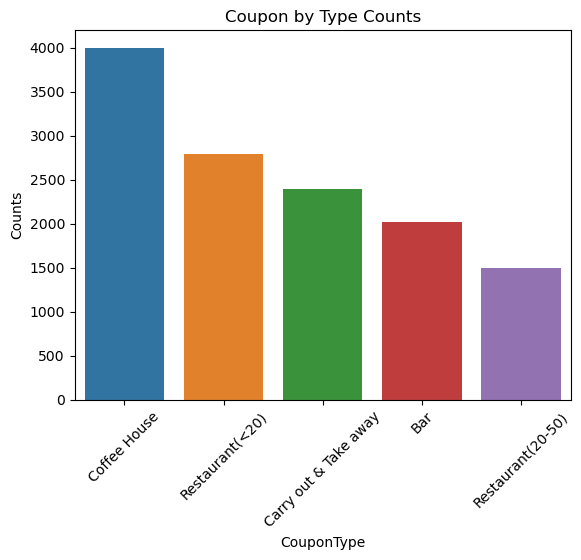

In [35]:
sns.barplot(data = clean_data['CouponType'].value_counts().reset_index(), x = 'CouponType', y = 'count')
plt.title('Coupon by Type Counts')
plt.xticks(rotation=45)
plt.ylabel('Counts')

6. Use a histogram to visualize the temperature column.

<span style="color:red">A/</span> 

A. Most of the coupons were delivered in ambient temperatures between 55 and 80 °F.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Temperature in °F')

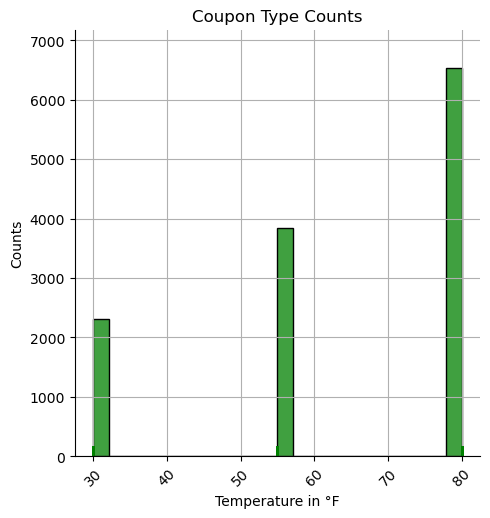

In [36]:
sns.displot(data = clean_data, x = 'Temperature', rug=True, color='Green')
plt.grid()
plt.title('Coupon Type Counts')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Temperature in °F')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


<span style="color:red">A/</span> 

In [37]:
bar_coupons_data = clean_data.query('CouponType == "Bar"')
bar_coupons_data

,Destination,Passanger,Weather,Temperature,Time,CouponType,CouponExpiration,Gender,Age,MaritalStatus,HasChildren,Education,Occupation,Income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,SameDirection,OppositeDirection,CouponAccepted
9,No Urgent Place,Kid(s),Sunny,80,1000,Bar,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,1800,Bar,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,700,Bar,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,Never,Never,NaN,4 To 8,1 To 3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,1000,Bar,24,Male,21,Single,0,Bachelors degree,Architecture & Engineering,68749.5,Never,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,1800,Bar,24,Male,21,Single,0,Bachelors degree,Architecture & Engineering,68749.5,Never,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,2200,Bar,24,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,Never,Never,1 To 3,4 To 8,1 To 3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,2200,Bar,2,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,Never,Never,1 To 3,4 To 8,1 To 3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,1000,Bar,24,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,Never,Never,1 To 3,4 To 8,1 To 3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,1800,Bar,2,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,Never,Never,1 To 3,4 To 8,1 To 3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


<span style="color:red">A/</span> 

In [38]:
accpt_bar_coupons_prop = bar_coupons_data.query('CouponAccepted == 1')['CouponAccepted'].dropna().count() / clean_data['CouponAccepted'].dropna().count() * 100
accpt_bar_coupons_prop

6.5200252286345

As we can see, only 6.52% accepted the bar coupon, meaning that bar coupons are not that popular.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<span style="color:red">A/</span> 

Those who went to a bar 3 or fewer times a month

In [39]:
bar_0_to_3_list = ['Never', 'Less Than 1', '1 To 3'] 
(clean_data.query('Bar in @bar_0_to_3_list & CouponAccepted == 1')['Bar'].count() / clean_data['Bar'].count()) * 100

49.83700405502107

Who went more

In [40]:
(clean_data.query("Bar not in @bar_0_to_3_list & CouponAccepted == 1")["Bar"].count() / clean_data["Bar"].count()) * 100

7.0525562534785715

The acceptance rate for those who have been to the bar between 0 and 3 times is almost 50% while those who have been to the bar 4 or more times is only 7%, which suggests that those who have visited the bar very few times are the most likely to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<span style="color:red">A/</span> 

Rate between drivers who go to a bar more than once a month and are over the age of 25

In [41]:
bar_1_to_max_list = ['1 To 3', '4 To 8', 'Greater Than 8'] 
(clean_data.query('Bar in @bar_1_to_max_list & Age > 25 & CouponAccepted == 1' )['Bar'].count() / clean_data['Bar'].count()) * 100

13.72346346505526

The Others

In [42]:
count_others = clean_data.query('CouponAccepted == 1' )['Bar'].count() \
    - clean_data.query('Bar in @bar_1_to_max_list & Age > 25 & CouponAccepted == 1' )['Bar'].count()
(count_others / clean_data['Bar'].count()) * 100

43.166096843444386

Those who accepted the coupon who have visited a bar more than once a month and are over 25 years old represent only 13.72% of the total of all records, while the others represent 43.17%, i.e. people who are not in the age group over 25 and who visit bars a lot are more likely to accept the coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<span style="color:red">A/</span> 

Rate between drivers who go to bars more than once a month and had passengers that were not a kid and were a kid

In [43]:
bar_1_to_max_list = ['1 To 3', '4 To 8', 'Greater Than 8'] 
(clean_data.query('Bar in @bar_1_to_max_list & Passanger != "Kid(s)" & CouponAccepted == 1')['Bar'].count() /
    clean_data['Bar'].count()) * 100

18.31120298958416

In [44]:
bar_1_to_max_list = ['1 To 3', '4 To 8', 'Greater Than 8'] 
(clean_data.query('Bar in @bar_1_to_max_list & Passanger == "Kid(s)" & CouponAccepted == 1')['Bar'].count() /
    clean_data['Bar'].count()) * 100

0.9700246481672895

Rate between drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry

In [45]:
(clean_data.query('Bar in @bar_1_to_max_list & Occupation != "Farming Fishing & Forestry" & CouponAccepted == 1')['Bar'].count() /
    clean_data['Bar'].count()) * 100

19.281227637751453

the rate is almost the same

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<span style="color:red">A/</span> 

Go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [46]:
bar_1_to_max_list = ['1 To 3', '4 To 8', 'Greater Than 8'] 
(clean_data.query('Bar in @bar_1_to_max_list & Passanger != "Kid(s)" & MaritalStatus != "Widowed" & CouponAccepted == 1')['Bar'].count() /
    clean_data['Bar'].count()) * 100

18.31120298958416

Go to bars more than once a month and are under the age of 30 OR

In [47]:
(clean_data.query('Bar in @bar_1_to_max_list & Age < 30 & CouponAccepted == 1')['Bar'].count() /
    clean_data['Bar'].count()) * 100

11.346107974874771

Go to cheap restaurants more than 4 times a month and income is less than 50K.

In [48]:
rst_1_to_max_list = ['4 To 8', 'Greater Than 8']
(clean_data.query('RestaurantLessThan20 in @rst_1_to_max_list & Income < 50000 & CouponAccepted == 1')['RestaurantLessThan20'].count() /
    clean_data['RestaurantLessThan20'].count()) * 100

10.904890871435398

The rates are very close to each other

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<span style="color:red">A/</span> 

I observe that those who have hardly visited a bar in the month (between 0 and 3 times) are more likely to accept the coupon than those who have already visited the bar several times a month since their acceptance rate is 49.84%, and when drivers do not have children on board the acceptance rate rises 18.31% vs. 0.97% when they have children on board.

### 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I first check which types of coupons are the most accepted, then I check if the passengers have an impact on the final choice.

<h2 style="color:Brown">Analysis 1</h2> 

First, is to verify which coupon types are the most widely accepted.

<h4 style="color:blue">Plot 1.1</h4> 

Verification of accepted coupons by type

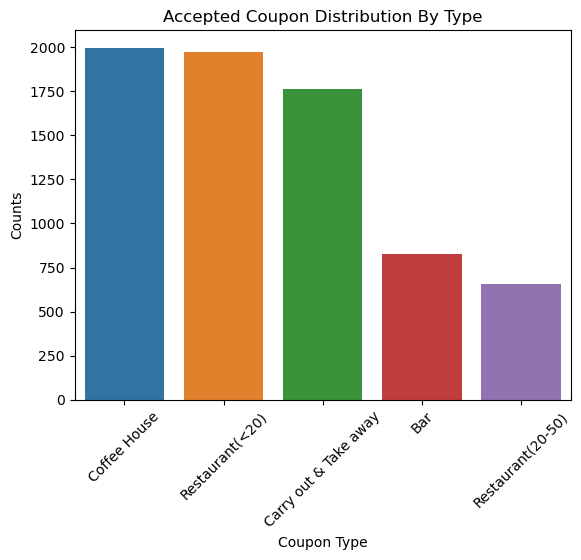

In [49]:
sns.barplot(data = clean_data.query('CouponAccepted == 1')['CouponType'].value_counts().reset_index().sort_values(by = 'count', ascending = False), x = 'CouponType', y = 'count')
plt.title('Accepted Coupon Distribution By Type')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Coupon Type')
plt.savefig('images/plot1_1.png', bbox_inches = 'tight')

<h4 style="color:blue">Plot 1.2</h4> 

Second, I analyze the probability of each type of coupon for accepted/unaccepted coupons.

probability by type = (accepted coupons grouped by type / all coupons grouped by type ) concat (unaccepted coupons grouped by type / all coupons grouped by type )

In [50]:
coupon_accepted_type_data = (clean_data.query('CouponAccepted == 1').groupby('CouponType')[['CouponAccepted']].count() \
    / clean_data.groupby('CouponType')[['CouponAccepted']].count()) * 100
coupon_noaccepted_type_data = (clean_data.query('CouponAccepted == 0').groupby('CouponType')[['CouponAccepted']].count() \
    / clean_data.groupby('CouponType')[['CouponAccepted']].count()) * 100
coupon_accepted_type_data['Accepted'] = 'Yes'
coupon_noaccepted_type_data['Accepted'] = 'No'
coupon_accep_noaccept_prob_data = pd.concat(
    [coupon_accepted_type_data, 
    coupon_noaccepted_type_data]
)
coupon_accep_noaccept_prob_data = coupon_accep_noaccept_prob_data.reset_index().sort_values(by = ['CouponAccepted'], ascending = [False])

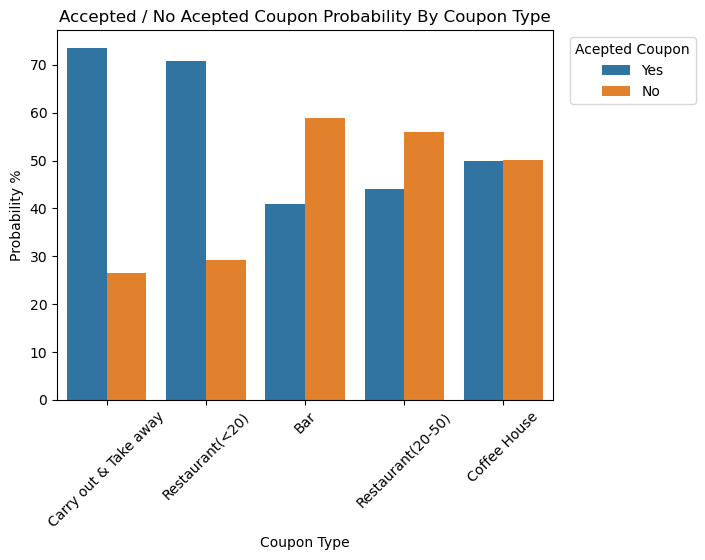

In [51]:
sns.barplot(x = 'CouponType',
            y = 'CouponAccepted', 
            hue = 'Accepted',
            data = coupon_accep_noaccept_prob_data, 
            )
plt.title('Accepted / No Acepted Coupon Probability By Coupon Type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Acepted Coupon')
plt.xticks(rotation=45)
plt.ylabel('Probability %')
plt.xlabel('Coupon Type')
plt.savefig('images/plot1_2.png', bbox_inches = 'tight')

<h4 style="color:blue">Plot 1.3</h4> 

third, I analyze the probability of each passanger type for accepted / unaccepted coupons

In [52]:
coupon_accepted_passgr_data = (clean_data.query('CouponAccepted == 1').groupby('Passanger')[['CouponAccepted']].count() \
    / clean_data.groupby('Passanger')[['CouponAccepted']].count()) * 100
coupon_noaccepted_passgr_data = (clean_data.query('CouponAccepted == 0').groupby('Passanger')[['CouponAccepted']].count() \
    / clean_data.groupby('Passanger')[['CouponAccepted']].count()) * 100
coupon_accepted_passgr_data['Accepted'] = 'Yes'
coupon_noaccepted_passgr_data['Accepted'] = 'No'
coupon_accep_noaccept_passgr_prob_data = pd.concat(
    [coupon_accepted_passgr_data, 
    coupon_noaccepted_passgr_data]
)
coupon_accep_noaccept_passgr_prob_data = coupon_accep_noaccept_passgr_prob_data.reset_index().sort_values(by = ['CouponAccepted'], ascending = [False])

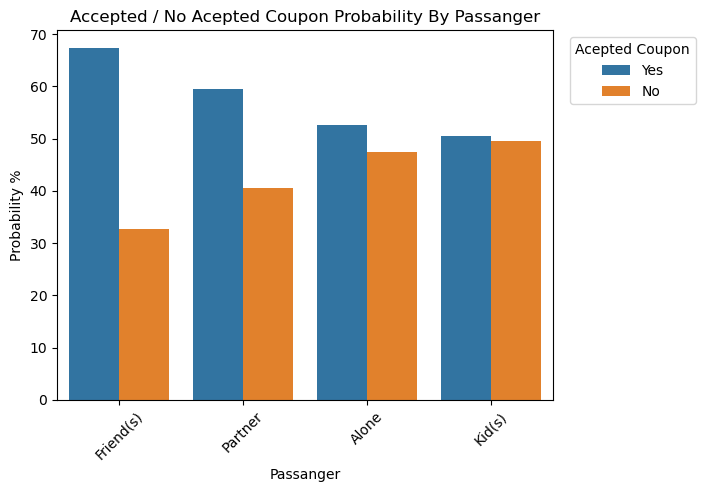

In [53]:
sns.barplot(x = 'Passanger',
            y = 'CouponAccepted', 
            hue = 'Accepted',
            data = coupon_accep_noaccept_passgr_prob_data, 
            )
plt.title('Accepted / No Acepted Coupon Probability By Passanger')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Acepted Coupon')
plt.xticks(rotation=45)
plt.ylabel('Probability %')
plt.xlabel('Passanger')
plt.savefig('images/plot1_3.png', bbox_inches = 'tight')

<h4 style="color:red">Conclusion 1.1</h4> 

We observe in plot 1.1 that coffee house is the most accepted coupon type followed by cheap restaurants. This gives us an idea of the type of coupon a driver is most likely to accept, but this does not give us a definitive conclusion because there is some bias in the data as there are more coupons for coffee house and cheap restaurants than the other types.

If we analyze the probability in plot 1.2 of each coupon to be accepted or not and compare it between each type of coupon we realize that 'Carry out & Take Away' and 'Restaurant < 20' are the most likely to be accepted. In the case of 'Coffee House' it does not seem as high as we thought in plot 1.1 since this type of coupon has a lower probability than the two leading ones.

In the plot 1.3 we can see that the passenger type 'Friend(s)' takes the lead with the highest probability of acceptance of all, having in the next place the type 'Kid(s)', the case of 'Kid(s)' is interesting because the probability of acceptance is very similar to the probability of rejection while the others have some difference.

<h2 style="color:Brown">Analysis 2</h2> 

We analyze the probability of coupon acceptance when we segment by passenger and coupon type.

In [54]:
pass_data = clean_data['Passanger'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
pass_data

,Passanger,count
0,Alone,7305
1,Friend(s),3298
2,Partner,1075
3,Kid(s),1006


<h4 style="color:blue">Plot 2.1</h4> 

Coupon Probability By Coupon Type and Passanger with AceptedCoupon in (1,0)

In [55]:
coupon_accep_noaccept_prob_pass_data = None
for passng in pass_data.iloc[:, 0]:
    coupon_accepted_type_pass_prob_data = (clean_data.query('Passanger == @passng & CouponAccepted == 1').groupby('CouponType')[['CouponAccepted']].count() \
        / clean_data.query('Passanger == @passng').groupby('CouponType')[['CouponAccepted']].count()) * 100
    coupon_noaccepted_type_pass_prob_data = (clean_data.query('Passanger == @passng & CouponAccepted == 0').groupby('CouponType')[['CouponAccepted']].count() \
        / clean_data.query('Passanger == @passng').groupby('CouponType')[['CouponAccepted']].count()) * 100
    
    coupon_accepted_type_pass_prob_data['Accepted'] = 'Yes'
    coupon_noaccepted_type_pass_prob_data['Accepted'] = 'No'
    coupon_accepted_type_pass_prob_data['Passanger'] = passng
    coupon_noaccepted_type_pass_prob_data['Passanger'] = passng
   
    coupon_accep_noaccept_prob_pass_data = pd.concat(
        [coupon_accepted_type_pass_prob_data, 
        coupon_noaccepted_type_pass_prob_data,
        coupon_accep_noaccept_prob_pass_data]
    )
    
coupon_accep_noaccept_prob_pass_data = coupon_accep_noaccept_prob_pass_data.reset_index().sort_values(by = ['CouponAccepted'], ascending = [False])

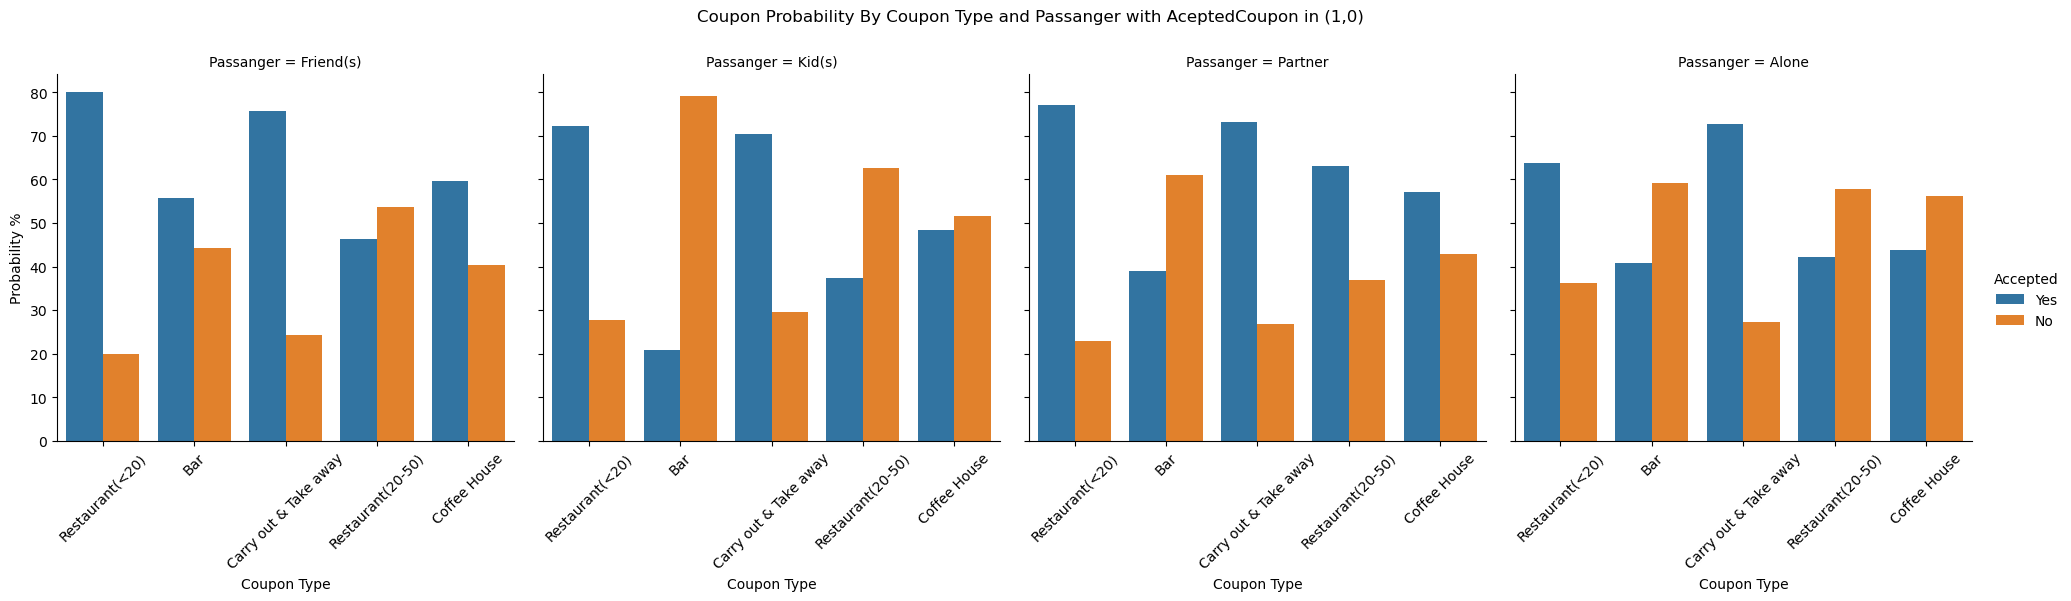

In [56]:
fig = sns.catplot(
    x="CouponType", 
    data=coupon_accep_noaccept_prob_pass_data, 
    y="CouponAccepted", 
    col='Passanger', 
    hue="Accepted",
    kind="bar")
fig.set_axis_labels("Coupon Type", "Probability %")
fig.set_xticklabels(rotation=45)
fig.fig.subplots_adjust(top=0.85)
fig.fig.suptitle('Coupon Probability By Coupon Type and Passanger with AceptedCoupon in (1,0)')
fig.fig.savefig('images/plot2_1.png', bbox_inches = 'tight')

<h4 style="color:blue">Plot 2.2</h4> 

Driver income mean based on coupon type and passanger with with AceptedCoupon = 1

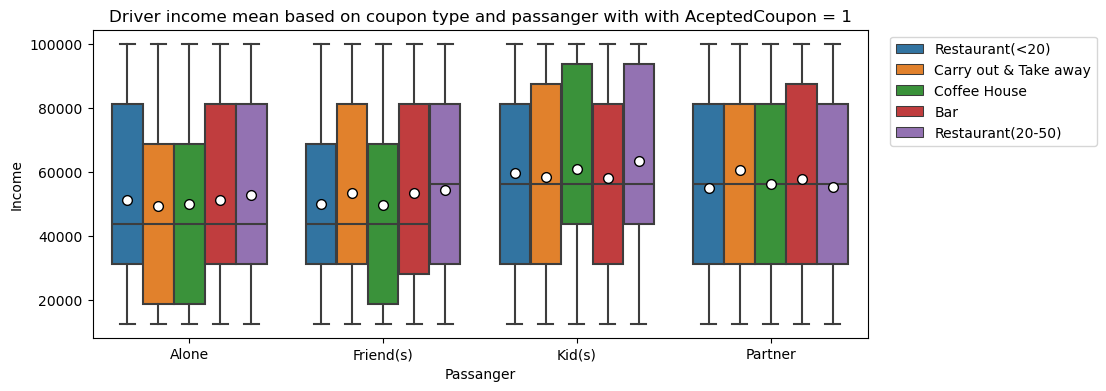

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(
    x='Passanger', 
    y='Income', 
    hue="CouponType",
    showmeans=True,
    meanprops={"marker":"o",
               "markerfacecolor":"white", 
               "markeredgecolor":"black",
              "markersize":"7"},
    data=clean_data.query("CouponAccepted==1"))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('Driver income mean based on coupon type and passanger with with AceptedCoupon = 1')
plt.ylabel('Income')
plt.savefig('images/plot2_2.png', bbox_inches = 'tight')

<h4 style="color:blue">Plot 2.3</h4> 

Driver income mean based on coupon type and passanger with AceptedCoupon = 1

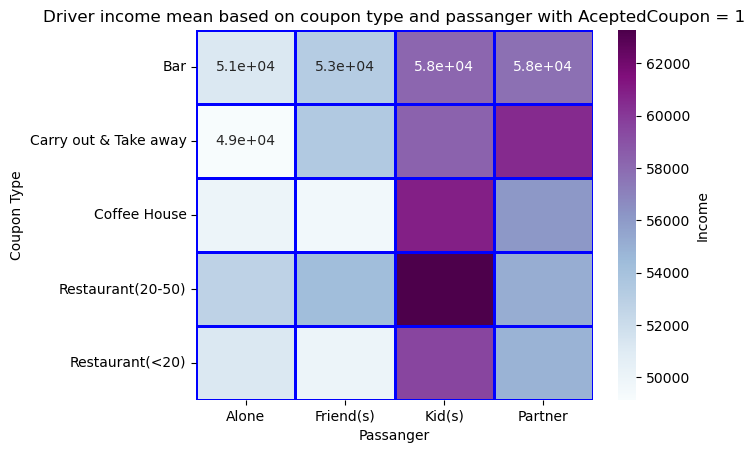

In [58]:
sns.heatmap(clean_data.query('CouponAccepted == 1').groupby(['CouponType','Passanger' ])['Income'].mean().reset_index().pivot(
    index='CouponType', 
    columns='Passanger', 
    values='Income'),
            cmap='BuPu',
            linewidths=1, 
            linecolor='blue', 
            cbar_kws={'label': 'Income'},
            annot=True)          
plt.title('Driver income mean based on coupon type and passanger with AceptedCoupon = 1')
plt.ylabel('Coupon Type')
plt.savefig('images/plot2_3.png', bbox_inches = 'tight')

<h4 style="color:red">Conclusion 2.1</h4> 

We can deduce from plot 2.1 that the predominant coupons that are most likely to be accepted for all passenger types are 'Restaurant(<20)' and 'Carry out & Take away'. Something to note in the analysis is the 'Bar' coupon type which is quite rejected when the passenger is 'Kid(s)', which makes sense since for obvious reasons children cannot enter a place where alcoholic beverages are served and drivers tend to ignore them probably for that reason. Bar is the least likely coupon to be accepted for each passenger category with the exception of the 'Friend' category.

If we relate the types of passengers to the average income of the driver (plot 2.2 and plot 2.3) we notice that those within the 'Alone' and 'Friend' categories are more likely to accept a coupon if they have a lower than average income, something that is not seen with the 'Kid(s)' type which is quite the opposite since it is those with a higher average income who are more likely to accept the coupon. As for 'partner' we can see here that the 'Bar' and 'Carry out & Take away' coupon types tend to have a higher probability of being accepted by those with higher than average incomes.

<h2 style="color:Brown">Analysis 3</h2> 

We analyze the probability of coupon acceptance when we segment by passenger and Gender.

<h4 style="color:blue">Plot 3.1</h4> 

Coupon Probability By Gender and Passanger with AceptedCoupon in (1,0)

In [59]:
coupon_accep_noaccept_prob_gender_pass_data = None
for passng in pass_data.iloc[:, 0]:
    coupon_accepted_type_gender_pass_prob_data = (clean_data.query('Passanger == @passng & CouponAccepted == 1').groupby('Gender')[['CouponAccepted']].count() \
        / clean_data.query('Passanger == @passng').groupby('Gender')[['CouponAccepted']].count()) * 100
    coupon_noaccepted_type_gender_pass_prob_data = (clean_data.query('Passanger == @passng & CouponAccepted == 0').groupby('Gender')[['CouponAccepted']].count() \
        / clean_data.query('Passanger == @passng').groupby('Gender')[['CouponAccepted']].count()) * 100
    
    coupon_accepted_type_gender_pass_prob_data['Accepted'] = 'Yes'
    coupon_noaccepted_type_gender_pass_prob_data['Accepted'] = 'No'
    coupon_accepted_type_gender_pass_prob_data['Passanger'] = passng
    coupon_noaccepted_type_gender_pass_prob_data['Passanger'] = passng
   
    coupon_accep_noaccept_prob_gender_pass_data = pd.concat(
        [coupon_accepted_type_gender_pass_prob_data, 
        coupon_noaccepted_type_gender_pass_prob_data,
        coupon_accep_noaccept_prob_gender_pass_data]
    )
    
coupon_accep_noaccept_prob_gender_pass_data = coupon_accep_noaccept_prob_gender_pass_data.reset_index().sort_values(by = ['CouponAccepted'], ascending = [False])

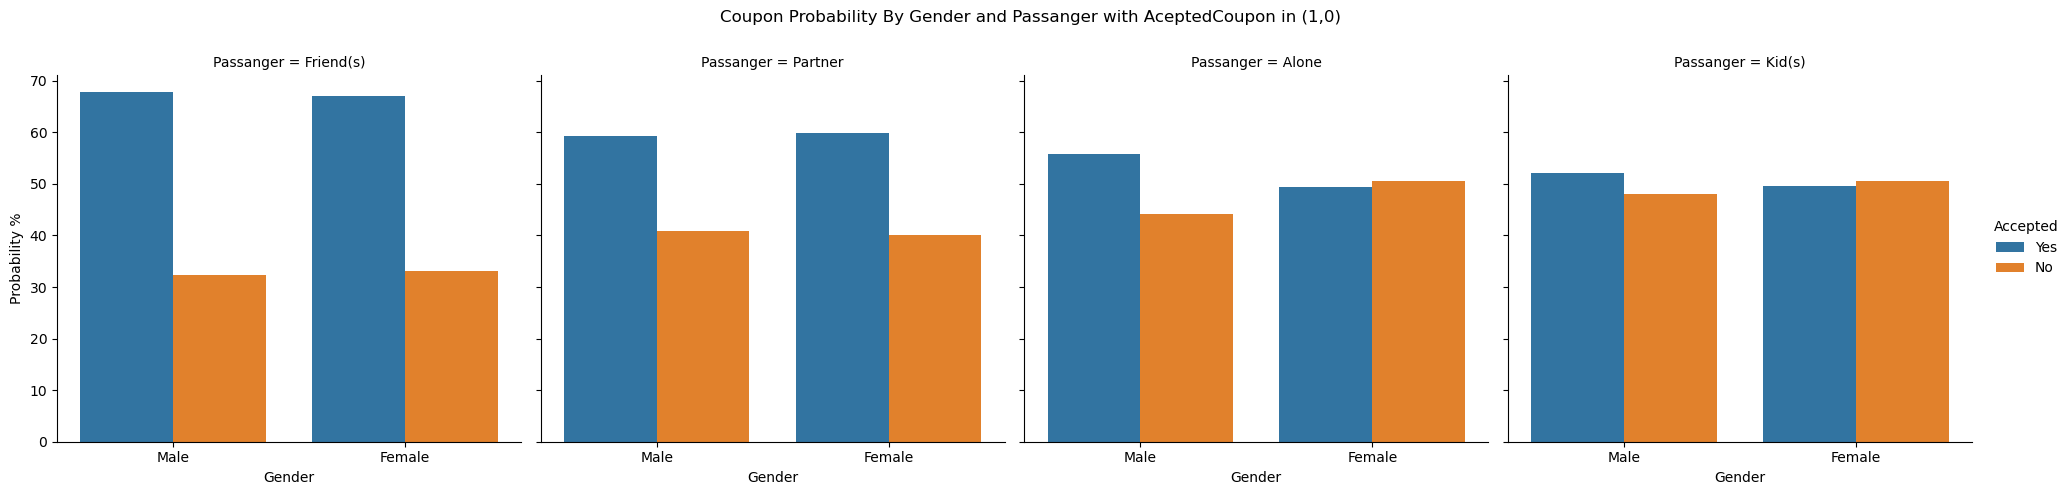

In [60]:
fig = sns.catplot(
    x="Gender", 
    data=coupon_accep_noaccept_prob_gender_pass_data, 
    y="CouponAccepted", 
    col='Passanger', 
    hue="Accepted",
    kind="bar")
fig.set_axis_labels("Gender", "Probability %")
fig.fig.subplots_adjust(top=0.85)
fig.fig.suptitle('Coupon Probability By Gender and Passanger with AceptedCoupon in (1,0)')
fig.fig.savefig('images/plot3_1.png', bbox_inches = 'tight')

<h4 style="color:blue">Plot 3.2</h4> 

Driver income mean based on gender and passanger with with AceptedCoupon = 1

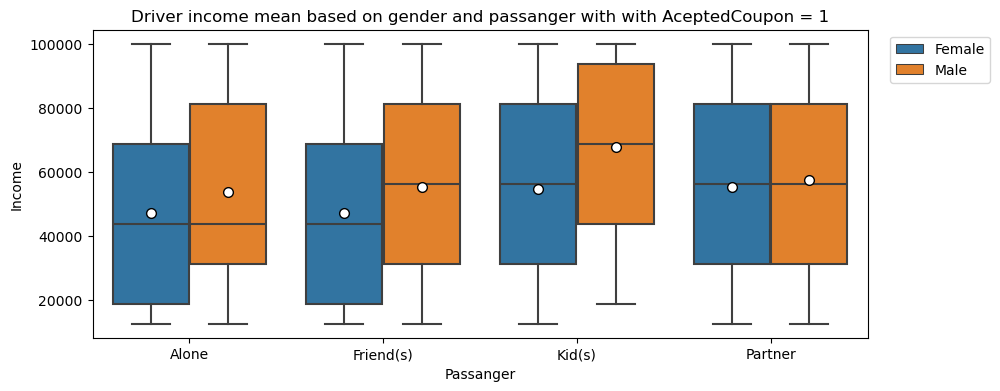

In [61]:
plt.figure(figsize=(10,4))
sns.boxplot(
    x='Passanger', 
    y='Income', 
    hue="Gender",
    showmeans=True,
    meanprops={"marker":"o",
               "markerfacecolor":"white", 
               "markeredgecolor":"black",
              "markersize":"7"},
    data=clean_data.query("CouponAccepted==1"))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('Driver income mean based on gender and passanger with with AceptedCoupon = 1')
plt.ylabel('Income')
plt.savefig('images/plot3_2.png', bbox_inches = 'tight')

<h4 style="color:blue">Plot 3.3</h4>

Driver income mean based on gender and Passanger with AceptedCoupon = 1

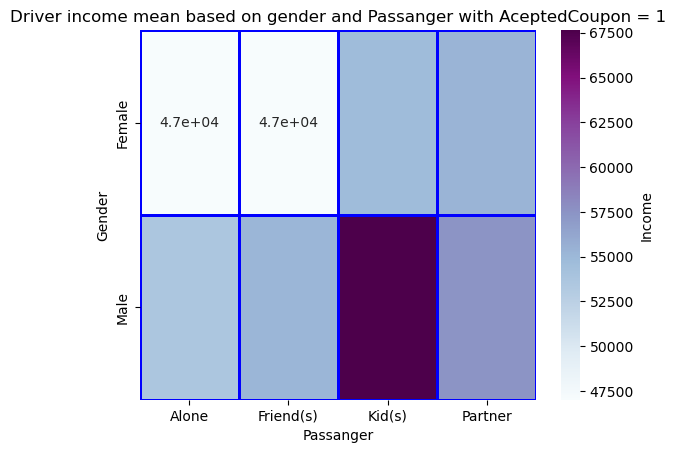

In [62]:
sns.heatmap(clean_data.query('CouponAccepted == 1').groupby(['Gender','Passanger' ])['Income'].mean().reset_index().pivot(
    index='Gender', 
    columns='Passanger', 
    values='Income'),
            cmap='BuPu',
            linewidths=1, 
            linecolor='blue', 
            cbar_kws={'label': 'Income'},
            annot=True)          
plt.title('Driver income mean based on gender and Passanger with AceptedCoupon = 1')
plt.ylabel('Gender')
plt.savefig('images/plot3_3.png', bbox_inches = 'tight')

<h4 style="color:red">Conclusion 3.1</h4> 

In this analysis if we look at plot 3.1 we can see that both men and women have a very similar probability of acceptance between them for each of the passenger categories, only in the 'Alone' passenger category men tend to accept more than women. There is a higher probability of acceptance between men and women when the passenger type is 'Friend' and 'Partner' but tends to be lower when the passenger type is 'Alone' and 'Kid(s)'. 

With respect to Plot 3.2 and Plot 3.3 we can observe that women tend to be more likely to accept the coupon in the categories 'Alone', 'Friend' and 'Kid(s)' when their income is lower than the overall average income while men do so with a slightly higher average income in these same categories. In the 'Partner' category, on the other hand, the acceptance values based on income are closer between men and women and lie more in the middle of the income values.

<h2 style="color:Brown">Analysis 4</h2> 

We analyze the probability of coupon acceptance when we segment by passenger and coupon expiration.

<h4 style="color:blue">Plot 4.1</h4>

Coupon Probability By Expiration and Passanger with AceptedCoupon in (1,0)

In [63]:
coupon_accep_noaccept_prob_exp_pass_data = None
for passng in pass_data.iloc[:, 0]:
    coupon_accepted_type_exp_pass_prob_data = (clean_data.query('Passanger == @passng & CouponAccepted == 1').groupby('CouponExpiration')[['CouponAccepted']].count() \
        / clean_data.query('Passanger == @passng').groupby('CouponExpiration')[['CouponAccepted']].count()) * 100
    coupon_noaccepted_type_exp_pass_prob_data = (clean_data.query('Passanger == @passng & CouponAccepted == 0').groupby('CouponExpiration')[['CouponAccepted']].count() \
        / clean_data.query('Passanger == @passng').groupby('CouponExpiration')[['CouponAccepted']].count()) * 100
    
    coupon_accepted_type_exp_pass_prob_data['Accepted'] = 'Yes'
    coupon_noaccepted_type_exp_pass_prob_data['Accepted'] = 'No'
    coupon_accepted_type_exp_pass_prob_data['Passanger'] = passng
    coupon_noaccepted_type_exp_pass_prob_data['Passanger'] = passng
   
    coupon_accep_noaccept_prob_exp_pass_data = pd.concat(
        [coupon_accepted_type_exp_pass_prob_data, 
        coupon_noaccepted_type_exp_pass_prob_data,
        coupon_accep_noaccept_prob_exp_pass_data]
    )
    
coupon_accep_noaccept_prob_exp_pass_data = coupon_accep_noaccept_prob_exp_pass_data.reset_index().sort_values(by = ['CouponAccepted'], ascending = [False])

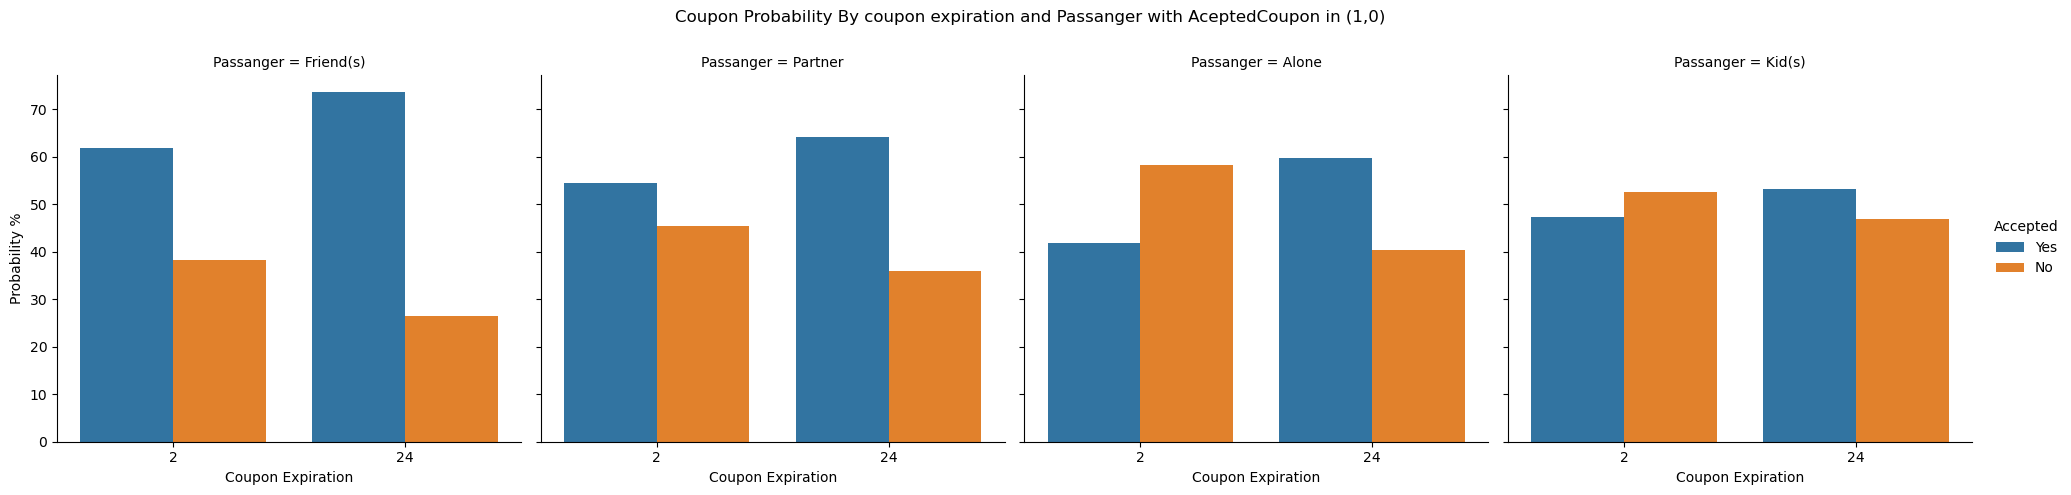

In [64]:
fig = sns.catplot(
    x="CouponExpiration", 
    data=coupon_accep_noaccept_prob_exp_pass_data, 
    y="CouponAccepted", 
    col='Passanger', 
    hue="Accepted",
    kind="bar")
fig.set_axis_labels("Coupon Expiration", "Probability %")
fig.fig.subplots_adjust(top=0.85)
fig.fig.suptitle('Coupon Probability By coupon expiration and Passanger with AceptedCoupon in (1,0)')
fig.fig.savefig('images/plot4_1.png', bbox_inches = 'tight')

<h4 style="color:red">Conclusion 4.1</h4> 

Plot 4.1 shows that there is a tendency for the condcutors to accept coupons that have a longer expiration time than those that expire more quickly, which is reflected for each type of passenger. 

The 2-hour coupon has a higher probability of acceptance than rejection in the 'Friends' and 'Partner' categories while the opposite is true in the 'Alone' and 'Kid(s)' categories where rejection is more pronounced than acceptance of the coupon.

The 24-hour coupon in all passenger categories always tends to be more accepted than rejected.

<h2 style="color:Brown">Final Thoughts</h2>

As a summary of what I have observed, I have the following final conclusions.

1. The coupons 'Restaurant(<20)' and 'Carry out & Take away' has a higher probability of being accepted, 'Bar' is among the coupons that tend less likely to be accepted by condcutors.
2. The driver with a 'friend(s)' passenger type is the most likely to accept the coupon, while the 'Kid(s)' type is the least likely.
3. When we group the data by passenger type, the coupons with the highest probability of being accepted are 'Restaurant(<20)' and 'Carry out & Take away' for all passenger types, only the coupon 'Bar' has the highest rejection ratio vs. acceptance when the passenger is 'Kid(s)'.

4. The 'Alone' and 'Friend' passenger categories are more likely to accept all types of coupons when the average income is somewhat low. In the 'Kid(s)' category, the opposite is true.

5. For men and women the average acceptance rate is higher in the 'Friend' and 'Partner' passenger categories while in the 'Alone' and 'Kid(s)' categories it tends to be lower.

6. Women coupon acceptors tend to have lower average incomes than men in each passenger category.

7. 24-hour coupons have a higher probability of acceptance than 2-hour coupons for all passenger categories. the rejection criterion for 2-hour coupons is higher in the 'Alone' and 'Kid(s)' categories. 
